# Life Expectancy Analysis

Dieses Notebook befasst sich mit der Analyse der Lebenserwartung "Life Expectancy (WHO)"-Datensatzes von Kaggle (https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who?resource=download).

## 1. Datenimport und erste Datenüberprüfung 

In diesem Abschnitt werden die erforderlichen Bibliotheken importiert und der Datensatz aus einer CSV-Datei geladen. Die ersten 5 Zeilen des Dataframes werden angezeigt, um einen ersten Überblick über die Daten zu erhalten.

In [9]:
# Importieren der benötigten Bibliotheken
import pandas as pd

# Lesen der CSV-Datei
df = pd.read_csv('LifeExpectancy/data/life_expectancy.csv')

# Anzeigen der ersten 5 Zeilen des Dataframes
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '.../data/life_expectancy.csv'

In [ ]:
# Beschreibung der Daten
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## 2. Überprüfung fehlender Werte

Es wird überprüft, ob im Datensatz fehlende Werte vorhanden sind. Die Anzahl der fehlenden Werte in jeder Spalte wird berechnet und angezeigt.

In [ ]:
# Überprüfen der Anzahl der fehlenden Werte in jeder Spalte
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

## 3. Korrelationsmatrix und Heatmap

In diesem Abschnitt wird eine Korrelationsmatrix für den Datensatz erstellt und visualisiert. Die Korrelationsmatrix zeigt die Beziehung zwischen den verschiedenen numerischen Variablen anhand von Farbcodierung. Eine Heatmap wird verwendet, um die Korrelationsmatrix anschaulich darzustellen.

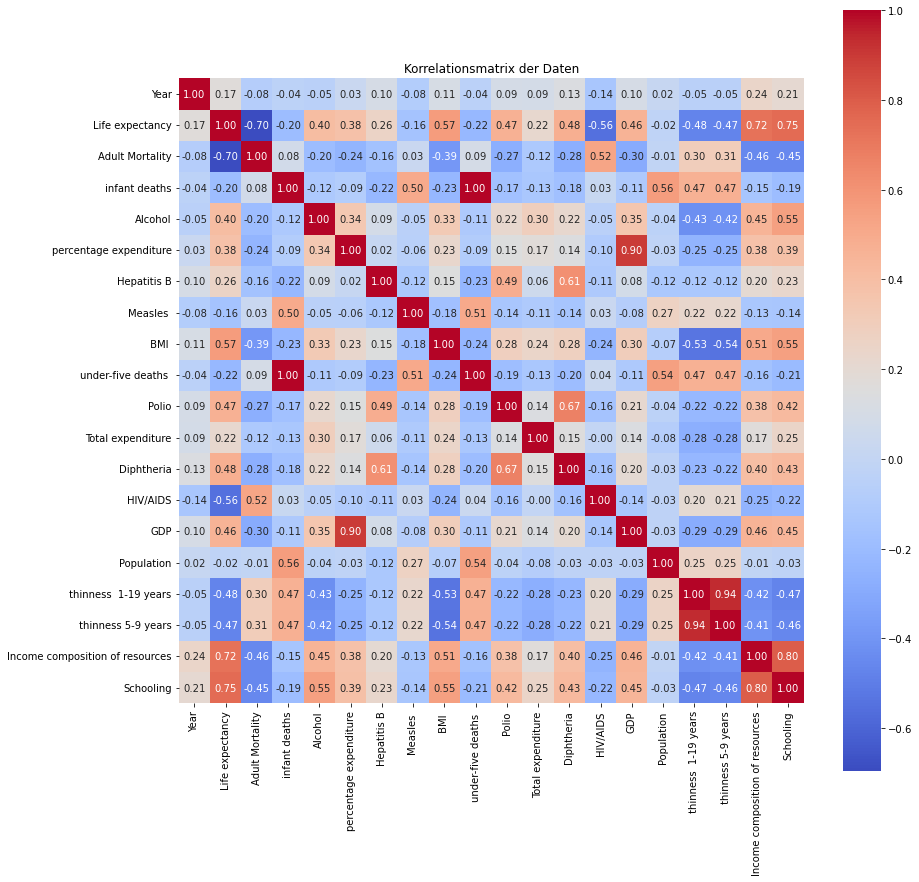

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Erstellen einer Korrelationsmatrix
corr = df.corr()

# Zeichnen der Korrelationsmatrix mit Seaborn's heatmap()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt='.2f', square=True, cmap='coolwarm')
plt.title('Korrelationsmatrix der Daten')
plt.show()

## 4. Fehlende Werte bereinigen

Fehlende Werte im Datensatz werden mit dem Durchschnittswert der jeweiligen Spalte aufgefüllt. Nach der Aufüllung wird erneut überprüft, ob noch fehlende Werte vorhanden sind.

In [ ]:
# Füllen der fehlenden Werte mit dem Durchschnittswert der jeweiligen Spalte
df = df.fillna(df.mean())

# Überprüfen, ob noch fehlende Werte vorhanden sind
df.isnull().sum()

/var/folders/lw/7g1877154b51k48b1b63pd3w0000gn/T/ipykernel_8517/983341014.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

## 5. Skalierung der Daten

Die numerischen Spalten im Datensatz werden mithilfe des MinMaxScaler-Verfahrens auf den Wertebereich von 0 bis 1 skaliert. Dies ermöglicht eine einheitliche Skalierung der Daten und erleichtert den Vergleich zwischen den Variablen.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialisieren des MinMaxScaler
scaler = MinMaxScaler()

# Liste der numerischen Spalten
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Anwenden des Scalers auf die numerischen Spalten
df[num_cols] = scaler.fit_transform(df[num_cols])

# Anzeigen der ersten 5 Zeilen des transformierten Dataframes
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,1.000000,Developing,0.544592,0.362881,0.034444,0.0,0.003659,0.653061,0.005439,...,0.031250,0.452118,0.649485,0.0,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923
1,Afghanistan,0.933333,Developing,0.447818,0.373961,0.035556,0.0,0.003774,0.622449,0.002319,...,0.572917,0.453279,0.618557,0.0,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092
2,Afghanistan,0.866667,Developing,0.447818,0.369806,0.036667,0.0,0.003759,0.642857,0.002027,...,0.614583,0.450377,0.639175,0.0,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261
3,Afghanistan,0.800000,Developing,0.440228,0.375346,0.038333,0.0,0.004014,0.673469,0.013135,...,0.666667,0.473012,0.670103,0.0,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430
4,Afghanistan,0.733333,Developing,0.434535,0.379501,0.039444,0.0,0.000364,0.683673,0.014200,...,0.677083,0.435287,0.680412,0.0,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937


## 6. Analyse der Verteilungen

Es werden Histogramme für alle numerischen Variablen im Datensatz erstellt, um ihre Verteilungen zu analysieren und mögliche Muster oder Ausreißer zu identifizieren.

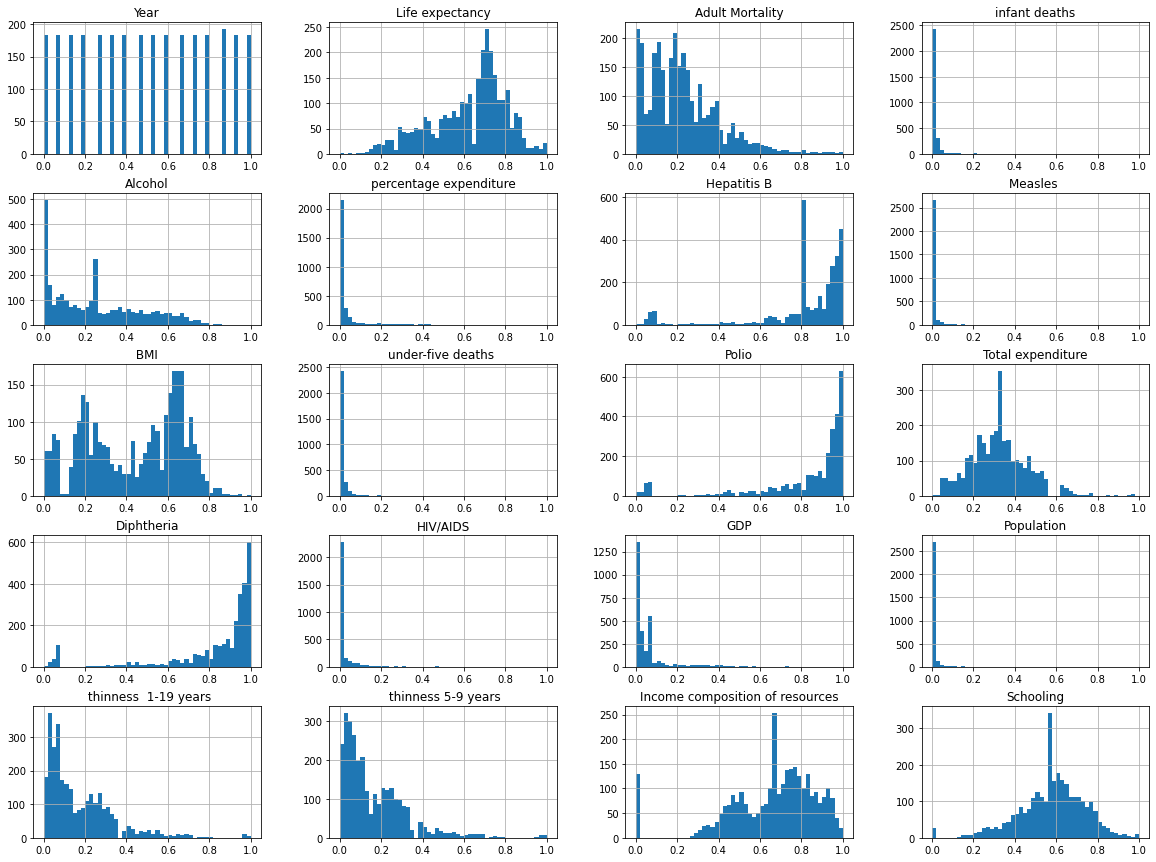

In [ ]:
# Analyse der Verteilungen
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# Analyse der Kennzahlen
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,0.501248,0.624762,0.226865,0.016836,0.257159,0.037898,0.815719,0.011403,0.432459,0.016814,0.828648,0.323168,0.828083,0.032517,0.062779,0.009857,0.171728,0.167380,0.661974,0.579362
std,0.307589,0.180411,0.171856,0.065515,0.219277,0.102049,0.230478,0.054044,0.230912,0.064178,0.243251,0.139308,0.243712,0.100550,0.110235,0.041593,0.159222,0.157288,0.216055,0.157700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.266667,0.510436,0.101108,0.000000,0.060610,0.000241,0.815719,0.000000,0.213210,0.000000,0.781250,0.232153,0.783505,0.000000,0.004857,0.000324,0.054348,0.052632,0.531909,0.497585
50%,0.533333,0.677419,0.198061,0.001667,0.232363,0.003332,0.877551,0.000080,0.486674,0.001600,0.937500,0.323168,0.938144,0.000000,0.026138,0.002841,0.119565,0.115789,0.698312,0.584541
75%,0.800000,0.745731,0.313019,0.012222,0.413214,0.022666,0.969388,0.001698,0.638470,0.011200,0.979167,0.403947,0.979381,0.013861,0.062779,0.009857,0.253623,0.249123,0.814346,0.681159
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 8. Variationskoeffizient

Der Variationskoeffizient für jede Variable im Datensatz wird berechnet. Die Variablen werden nach dem Variationskoeffizienten in absteigender Reihenfolge sortiert, um die Variablen mit den größten Abweichungen zu identifizieren und anzuzeigen.

In [3]:
# Berechnung des Variationskoeffizienten für jede Variable
cv = df.std() / df.mean()

# Sortieren der Variablen nach dem Variationskoeffizienten in absteigender Reihenfolge
cv = cv.sort_values(ascending=False)

# Anzeigen der Variablen mit den größten Abweichungen
cv

NameError: name 'df' is not defined

In [2]:
# Speichere den bereinigten Datensatz als CSV-Datei
df.to_csv('../data/life_expectancy_cleaned.csv', index=False)

NameError: name 'df' is not defined